## Linear Algebra (CpE210A)

#### <br>Laboratory 2: Plotting Vectors using NumPy and MatPlotLib

<br>Coded and submitted by:
<br><i>ANGELO, Jamaica Joy S.
<br>58010

##### <b>Lab Exercises:</b>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

## <b>Part 1: Skyline Eagle Fly</b>

You are tasked to make a tracking device for Philippine Eagles at the Philippine Eagle Center at Davao. The tracker sensors only give the longitudinal and latitudinal distance (meters) of the eagle's position relative to their nests which we will treat as the origin of the tracking view. We want to determine the relative <b>displacement</b> of the eagle from its nest. It is expected that the eagles will change exactly two times, it can then be assumed that the program will show three displacements. Please make a prototype code using the additional information given below:

Consider the computational algorithm:

Let the eagle's longitudinal and latitudinal be  $long$  and  $lat$  respectively.
Let the eagle's total distance as  disttotal , displacement be  $disp$ , and  $\theta$  as the direction of the vector.

$ (Eq.1)dist_{total} = (long_{total})\hat{x} + (lat_{total})hat{y} $
<br> $ (Eq.2) disp = \sqrt{dist_x^{2} + dist_y^{2}} $
<br> $ (Eq.3) {\theta} = arctan (\frac{y}{\alpha x})$

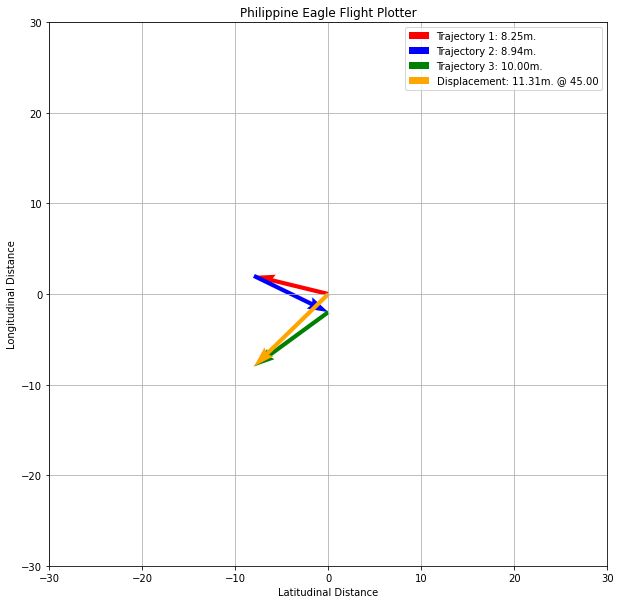

In [18]:
## START OF FUNCTION
%matplotlib inline
def track_eagle(make_figs=True):
    long = np.random.randint(-10,10, size=3) ## since we don't actually have eagle tracking data we will use
    lat = np.random.randint(-10,10, size=3)  ## random integers for this activity. These two lines will produce
                                             ## a vector with shape of (3,) describing the distances for the 
                                             ## eagle's flight.

    dist1 = np.array([long[0], lat[0]])                             ## setup the array for each vector for the eagle's flight.
    dist2 = np.array([long[1], lat[1]])
    dist3 = np.array([long[2], lat[2]])

    dist_total = dist1 + dist2 + dist3                              ## formula for the resultant vector for the eagle's flight.
    disp  = np.linalg.norm(dist_total)                              ## formula for the magnitude of the displacement
    alpha = 10**-6
    theta = np.arctan((dist_total[1])/(dist_total[0] + alpha))      ## computes for the angle of the displacement.
    theta = np.degrees(theta)                                       ## converts theta from rad to deg.
     
        ## Plotting the PH Eagle flight vectors.
    plt.figure(figsize=(10,10))
    plt.title('Philippine Eagle Flight Plotter')
    plt.xlim(-30, 30)
    plt.ylim(-30, 30)
    plt.xlabel('Latitudinal Distance')
    plt.ylabel('Longitudinal Distance')
    plt.grid()
    n = 2
    
    
     ### Self-discovery code block (Refer to guide question 2 for the task)
        
        # Parameters of quiver([X, Y], U, V, [C], **kw)
        #[X, Y] as the location of the arrow
        #U, V as the direction of the arrow
        # C sets the color of the arrows
        # Units - to plot the vectors in the x-y plane, with u and v having the same units as x and y, 
            # Angles - determines the angle of the arrows: 
                # (cont.) use angles = 'xy', 
            # Scale - this is the number of data units per lenth of arrow
                # use scale = 1.
            # scale_units - used to set the units with wrt x and y
                # scale_units='xy',

        
    #Trajectory 1 - RED ARROW:
    plt.quiver(0,0, dist1[0], dist1[1], 
               angles='xy', scale_units='xy',scale=1, color='red', 
               label='Trajectory 1: {:.2f}m.'.format(np.linalg.norm(dist1)))
    
    #Trajectory 2 - BLUE ARROW:
    plt.quiver(dist1[0], dist1[1], dist2[0], dist2[1], 
               angles='xy', scale_units='xy',scale=1, color='blue',
              label='Trajectory 2: {:.2f}m.'.format(np.linalg.norm(dist2)))
    
    #Trajectory 3 - GREEN ARROW:
    plt.quiver(np.add(dist1[0],dist2[0]), np.add(dist1[1],dist2[1]),
               dist3[0], dist3[1], angles='xy', scale_units='xy',scale=1, color='green',
              label='Trajectory 3: {:.2f}m.'.format(np.linalg.norm(dist3)))
    
    #Total Displacement - ORANGE ARROW:
    plt.quiver(0,0, dist_total[0], dist_total[1], 
               angles='xy', scale_units='xy',scale=1, color='orange',
              label='Displacement: {:.2f}m. @ {:.2f}'.format(disp, theta))
    
    plt.legend() #places the legend on the axes
    
    if make_figs:
        plt.savefig(f'LinAlg-Lab2-PH Eagle-{int(disp)}@{int(theta)}.png', dpi=300)
    
    plt.show()
    
## END OF FUNCTION  
track_eagle(make_figs = False) #Let make_figs be equal to FALSE when executing the code.

### Guide Questions:

1. What is the use of the variable  α ?
   <p style='text-align: justify;'> - To prevent dividing by 0, the alpha was added because it might cause an error.</p>
2. Kindly explain the process of plotting the eagle flight vectors.
    - A *plt.quiver()* function displays the velocity vectors. In cell 1, there are 4 quiver plots naming Trajectory 1, Trajectory 2, Trajectory 3, and the Total Displacement. The parameters that was used is quiver’s call signature *quiver([X, Y], U, V, [C], scale, angles, scale_units, units)*. X, Y serves as the arrow location’s starting point. The xy in Trajectories 1, 2, 3, and Total Displacement are: 
         - 0,0, dist1[0], dist1[1]
         - np.add(dist1[0],dist2[0]
         - np.add(dist1[1],dist2[1]
         - 0,0
    - The reason behind this xy values is shown on the graph in which Trajectories 1, 2, and 3 are connected to 0,0 as the origin can be seen. These values will display 3 connected vectors from the origin to the end of Trajectory 3 resulting a Total Displacement.  U, V is then defined as the location of the arrow and will act as the direction in which Trajectories 1, 2, 3, and the Total Displacement will point towards to. Meanwhile, U, V in Trajectories 1, 2, 3, and Total Displacement are: </p>
         - dist1[0], dist1[1], dist2[0], dist2[1]
         - dist3[0], dist3[1]
         - dist_total[0], dist_total[1]
    - These U, V values are created using a randomly generated values in the longitude and latitude variables. While C sets the color of the arrows for easy recognition. Lastly, to plot the vectors in the x-y plane, u, v has the same units as x,y which are *angles = ‘xy’, scale_units = ‘xy’, and scale = 1*. *Plt.legend()* places the legend on the axes and *plt.show()* will display and show all the figures and it will not return unless all the windows are closed.

3. Provide a flow chart describing the 'track_eagle' function. Please use LucidCharts or similar apps in making charts.


### FLOWCHART:

<img src="img/flowchart.jpeg" width=700 align="center"/>

### SCREENSHOTS:

<img src="img/plot 1.jpeg" width=550 align="center"/>

<img src="img/plot 2.jpeg" width=550 align="center"/>

<img src="img/plot 3.jpeg" width=550 align="center"/>

<img src="img/plot 4.jpeg" width=550 align="center"/>

## <b>Part 2: Reverse Engineering
Your project manager found out that the previous engineer that handled the project did some sort of algorithm regarding the eagles. He gave you the piece code for you to analyze and required you to make a documentation out of it. The code is given below.
<br> The *def eagle_kinematics* goal is to get the position of *position_total, velocity_total,* and the *acceleration_total*. Below is the computational algorithm:
<br> $ s_t = $ sum of $ [position[\colon]] \times [totalvector[\colon]] $
<br> $ v_t = $ sum of $ [velocity[\colon]] \times [totalvector[1\colon]] $
<br> $ a_t = $ sum of $ [acceleration[\colon]] \times [totalvector[2\colon]] $

In [6]:
def eagle_kinematics(position, time):
    req_shape = 4
    velocity = np.zeros((req_shape-1,)) #array [0, 0]
    acceleration = np.zeros((req_shape-2,)) # array [0, 0]
    total_vector = np.array([t**3, t**2, t, 1]) # array [8, 4, 2, 1] t is multiplied to the given.
    if position.shape == (req_shape,):
        velocity = np.array([3*position[0],2*position[1], position[2]]) #array [6, 2, 3]
        acceleration = np.array([2*velocity[0],velocity[1]]) # array [12, 2]
        position_total = np.sum(np.multiply(position, total_vector)) # np.multiply([8, 4, 2, 1], [2, 1, 3, 2]) = np.sum[16, 4, 6, 2 = 28]
        velocity_total = np.sum(np.multiply(velocity, total_vector[1:])) # np.multiply([4, 2, 1], [6, 2, 3]) = np.sum[24, 4, 3 = 31]
        acceleration_total = np.sum(np.multiply(acceleration, total_vector[2:])) # np.multiply([2, 1], [12, 2]) = np.sum[24, 2 = 26]
        
    else:
        print(f'Input displacement vector is not valid. Make sure that the vector shape is ({req_shape},)')
    
    return position_total, velocity_total, acceleration_total

In [9]:
x = np.array([2,1,3,2])
t = 2
eagle_kinematics(x, t)

(28, 31, 26)

### Guide Questions:

1. What is the function for? Explain the inputs, process, functions used, and the outputs.
   - *def eagle_kinematics* function aims to get the *position_total, velocity_total,* and the *acceleration_total*. The inputs are the positions of the eagle in time labelled as *x* and *t*. Next, the process to get the *position_total* is to use 
     - *np.multiply([8, 4, 2, 1], [2, 1, 3, 2]) = np.sum[16, 4, 6, 2 = 28]* 
   - Then, to get the *velocity_total*, use
     - *np.multiply([4, 2, 1], [6, 2, 3]) = np.sum[24, 4, 3 = 31]*
   - Last is to get the *acceleration_total*,
     - *np.multiply([2, 1], [12, 2]) = np.sum[24, 2 = 26]*
   - These multiplies the array, then add them up. As for the functions, *np.zeros(), np.array(), np.sum()*, and *np.multiply()* was used in the cell. To return an array full of zeros, *np.zeros()* was used. Meanwhile, *np.array()* was used to create an array. While *np.sum()* was used in order to get the sum of the arrays, *np.multiply()* was used to multiply the array arguments. Finally, the outputs for this cell are *position_velocity, velocity_total*, and *acceleration_total.*

2. Kindly provide equations for  $s_t$ , $v_t$ , and  $a_t$  basing on their code.
    - Below is the equation for $s_t , v_t$ , and  $a_t$ :
<br> $ s_t = $ sum of $ [position[\colon]] \times [totalvector[\colon]] $
<br> $ v_t = $ sum of $ [velocity[\colon]] \times [totalvector[1\colon]] $
<br> $ a_t = $ sum of $ [acceleration[\colon]] \times [totalvector[2\colon]] $

## Part 3: Bebang's Online Business
You have a friend named Bebang who has an online business in which she sells donuts. She asks you to make something that helps her to observe the increase and decrease of her profit considering the reach of her online posts. As novice data analytic engineers, you suggest to make a plotter using vectors of her weekly profit and FB post reach for a month. She is amazed that you have this idea and will pay you 15,000 PHP for the program. Thus you venture in implementing your idea with the PH Eagle Tracker as the base code.

In [60]:
## START OF FUNCTION
def month_profit_trace(profit, reach, make_figs=True): ## You can simplify/ optimize this code for extra points
    if (profit.shape == (4,)) and (reach.shape == (4,)): 
        week1 = np.array((reach[0], profit[0]))       
        week2 = np.array((reach[1], profit[1]))
        week3 = np.array((reach[2], profit[2]))
        week4 = np.array((reach[3], profit[3]))
        
        week_total = week1 + week2 + week3 + week4    ## computes for the result
        week_performance = np.linalg.norm(week_total) ## computes the magnitude
        alpha = 10**-6
        reach_gradient = np.arctan((week_total[1])/(week_total[0] + alpha))  ## computes for the angle of the displacement since it uses arctan
        reach_gradient = np.degrees(reach_gradient)                          ## converts theta from rad to deg
    
        plt.figure(figsize=(16,5))
        plt.title('Bebang\'s Month Post Efficiency')
        plt.xlim(0,1.01*np.sum(reach))
        plt.ylim(-np.sum(np.abs(profit)),np.sum(np.abs(profit)))
        plt.xlabel('FB Post Reach Increment')
        plt.ylabel('Profit')
        plt.grid()
        #n = 2
        
        # WEEK 1
        plt.quiver(0,0, week1[0], week1[1], 
                   angles='xy', scale_units='xy',scale=1, color='lightseagreen', width=0.0025,
                   label='Week 1: {:.2f}'.format(np.linalg.norm(week1)))
        
        #WEEK 2
        plt.quiver(week1[0], week1[1], week2[0], week2[1], 
                   angles='xy', scale_units='xy',scale=1, color='limegreen', width=0.0025,
                   label='Week 2: {:.2f}'.format(np.linalg.norm(week2)))
        
        #WEEK 3
        plt.quiver((week1[0] + week2[0]), (week1[1] + week2[1]), week3[0], week3[1], 
                   angles='xy', scale_units='xy',scale=1, color='sandybrown', width=0.0025,
                   label='Week 3: {:.2f}'.format(np.linalg.norm(week3)))
        
        #WEEK 4
        plt.quiver((week1[0] + week2[0] + week3[0]), (week1[1] + week2[1] + week3[1]), week4[0], week4[1], 
                   angles='xy', scale_units='xy',scale=1, color='palevioletred', width=0.0025,
                   label='Week 4: {:.2f}'.format(np.linalg.norm(week4)))
        
        ## put necessary vector plotting code here

        plt.quiver(0,0, week_total[0], week_total[1],
                   angles='xy', scale_units='xy',scale=1, color='violet', width=0.005,
                   label='Efficiency: {:.2f} @ {:.2f}'.format(week_performance, reach_gradient))

        plt.legend(loc='upper left')

        if make_figs:
            plt.savefig(f'LinAlg-Lab2-Bebang Post Eff-{int(week_performance)}@{int(reach_gradient)}.png', dpi=300)

        plt.show()
    
    else:
        print('Calculations not yet done. It may be finished by the end of the month. Please get back soon.') ## Make a more appropriate error statement. 

## END OF FUNCTION

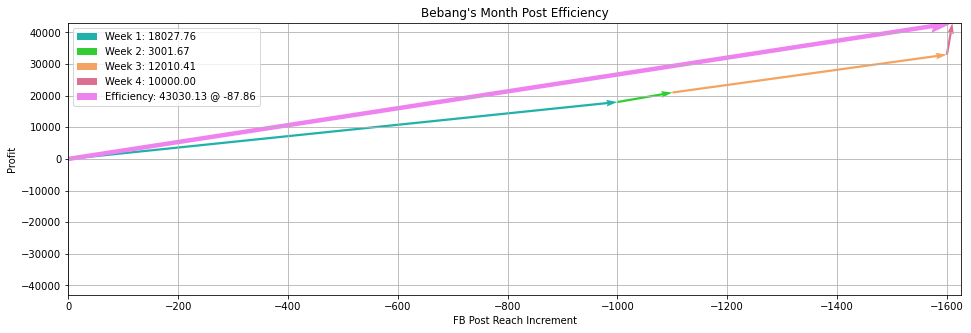

In [95]:
profit = np.array([-18000, -3000, -12000, -10000]) ## This is Bebang's Online Business profit
# OG Values: -18000, 3000, 12000, 10000
reach = np.array([-1000, -100, -500, -10])         ## This is Bebang's FB post reach 
#OG Values: 1000, 100, 500, 10

month_profit_trace(profit, reach, make_figs=False) ## Toggle make_figs when making documentation or executing the code

### Guide Questions:

1. What is the relationship between the FB post reach and the profit?
   - The relationship between the profit and the FB Post is directly proportional to the efficiency meaning, if Bebang's FB post reaches more engagements or if her profit increases, her FB post's efficiency goes up as well and the other way around. 

2. Why is profit in the y-axis and FB post reach on the x-axis and not the other way around?
   - The profit in the y-axis and FB post reach is on the x-axis is because it's more efficient. For instance, when there's net loss in our profit, we can have a negaive value. Meanwhile, as for the FB post, since it's a bit irrational or have a negative reach/engagements in Facebook, we could only have positive values. The reason why the profit is not the other way around is because it will be harder to read and the graph would be in a vertical position. If the x and y-axis is in the other way around, the code will be also changed since they are the values related to the x and y-axis specfically plt.xlim, plt.ylim, plt.xlabel, and plt.ylabel.
3. Kindly explain the process of plotting the post efficiency vectors.
   - It is much similar in the first cell because the process of how they were plot is the same. The parameters that were used is quiver’s call signature *quiver([X, Y], U, V, [C], the units)*. Reach and profit is being represented by xy, the weeks were represented by uv, color for C, and the units that was used are width, scale, scale_units, and angles. The process for the first and third cell is similar but different in values.
4. Provide a necessary equations that are representative to finding the  $ performance_{week} $  and  $reach_{gradient}$
<br> $ performance_{week} = \sqrt{weektotal[0]^{2} + weektotal[1]^{2}} $
<br> $ reach_{gradient} = \arctan({weektotal[1]\div weektotal[0] + \alpha}) $
5. Try to alter the 'reach' and 'profit' values to display different scenarios. Save at least 3 scenarios then append and discuss the figures in your report.
##### Derived from the original scenario:
    - <b> 1st Scenario: </b> decreased profit = decreased efficiency.
    - <b> 2nd Scenario: </b> higher reach = higher efficiency
    - <b> 3rd Scenario: </b> decreased reach = decreased efficiency
6. What can be observed and concluded with the behavior of the vectors with respect to post efficiency?
   - Based on the observations in the graph, everytime that the reach of the profit inscreases or decreases, the efficiency will also decrease or increase. For that reason, in conclusion, the behaviours of the vectors are directly proportional to the Bebang's FB post efficiency.